# CIC prediction

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
output_folder = './validation_report/CIC'

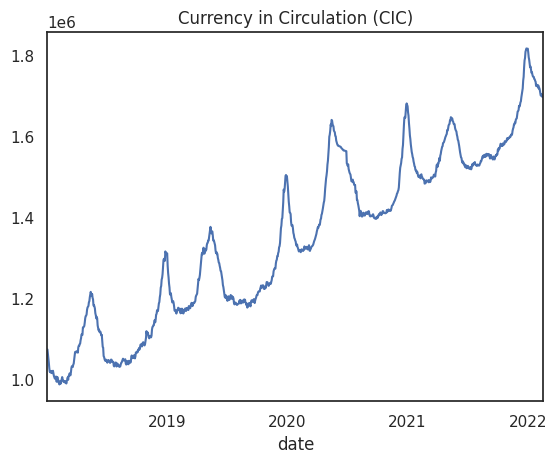

In [33]:
CIC = pd.read_excel('../data/CIC.xlsx', parse_dates=['date'], index_col='date')
CIC['CIC'].plot(title = 'Currency in Circulation (CIC)'); plt.show()

In [34]:
holiday_type = pd.read_excel('../data/holidays.xlsx', parse_dates=['date'], index_col='date')
holiday_type = pd.get_dummies(holiday_type['Type']).astype(int)
holiday_type = holiday_type.resample('B').last().fillna(0)

data = CIC.merge(holiday_type, how='left', left_index=True, right_index=True).fillna(0)

## Section 2: Model Definition

In [35]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastAutoTBATS,
)
from sktime.forecasting.fbprophet import Prophet
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "Seasonal_Naive": NaiveForecaster(sp = 5),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_D = 262, max_p= 10, max_q=10),
    "AutoETS": StatsForecastAutoETS(season_length=262),
    "AutoCES": StatsForecastAutoCES(season_length=262),
    "AutoTheta": StatsForecastAutoTheta(season_length=262),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=262, 
                                        use_trend =True, use_boxcox=True),
    "Prophet": Prophet(yearly_seasonality=True, weekly_seasonality=True),
}
from forecast_combine import model_select as f
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'CIC',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            forecasters_d= ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

### Cross validation Procedure

In [36]:
_ = model.split_procedure_summary()

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


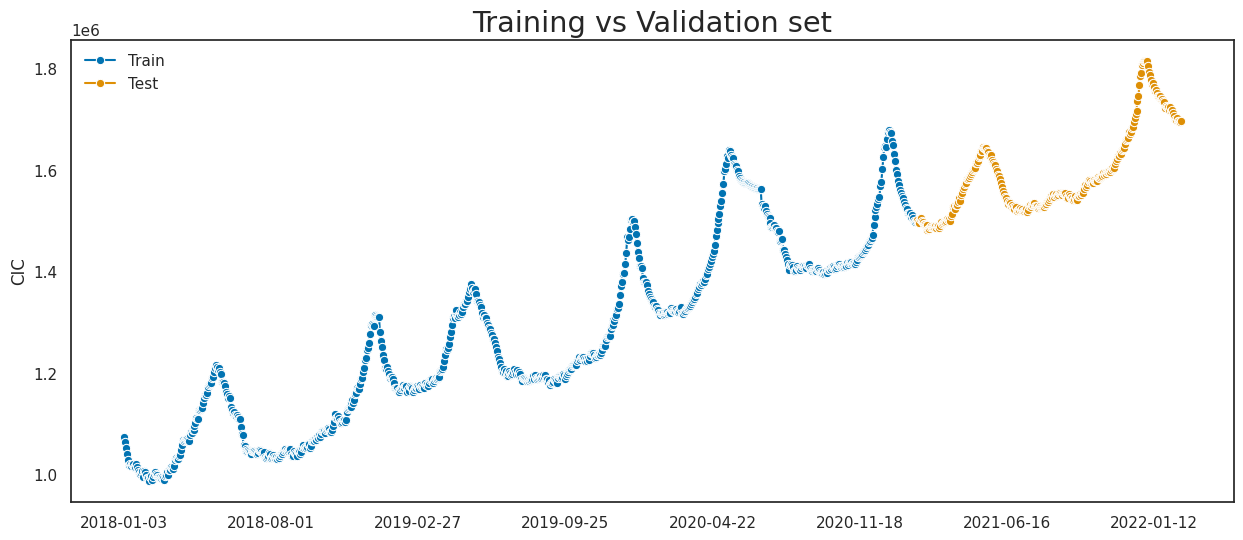

In [37]:
f, ax = model.plot_train_test(labels = ['Train', 'Test'], title='Training vs Validation set')
f.savefig(os.path.join(output_folder, 'train_test.png'), dpi=300)

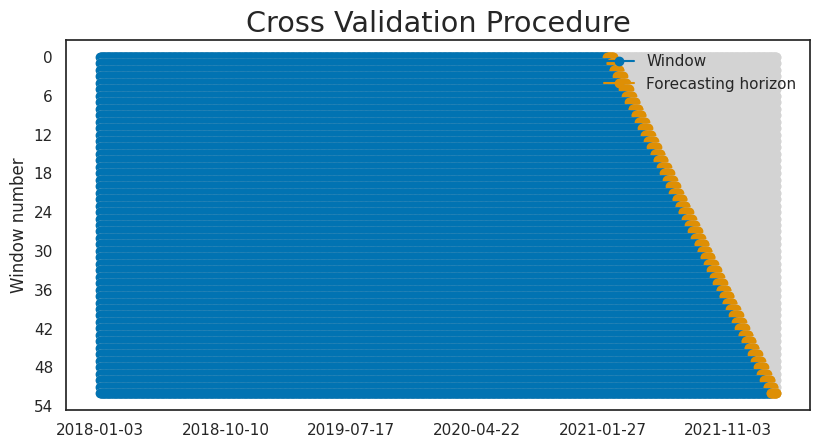

In [38]:
f = model.plot_cv_procedure(xlabel='')
plt.savefig(os.path.join(output_folder, 'cross_validation.png'), dpi=300)

### Out-Of-sample Evaluation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
summary_horizon, summary_results = model.evaluate()


Start Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.043 minutes

Start Seasonal_Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/utils/seasonality.py:116: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df.index = df.index.to_period(freq=freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/utils/seasonality.py:122: FutureWarning: PeriodDtype[B] is deprecated and will be removed in 

Evaluation completed in: 0.021 minutes

Start AutoARIMA forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/

Evaluation completed in: 0.229 minutes

Start AutoETS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.453 minutes

Start AutoCES forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.392 minutes

Start AutoTheta forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.309 minutes

Start AutoTBATS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated

Evaluation completed in: 0.344 minutes

Start Prophet forecaster evalution....


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plot

Evaluation completed in: 0.028 minutes


In [40]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
AutoCES,53,22.294458,0.24946,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,11736.409383,10351.165386,0.006465,-5.535221,10129.646862
AutoETS,53,25.931965,0.19926,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,13899.218382,11894.001577,0.00732,-2.776147,11192.280134
AutoTBATS,53,13.837338,0.004661,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,15928.689992,13817.38798,0.008546,-7.821278,13432.852325
Prophet,53,0.530626,0.040792,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,16242.090808,15093.115353,0.009353,-11.257105,14863.131457
AutoTheta,53,13.269466,0.209222,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,17505.52317,15425.711792,0.009453,-3.293195,15357.893868
Naive,53,0.003118,0.044278,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,17816.870378,15701.801887,0.009626,-3.532311,15665.179245
AutoARIMA,53,11.719973,1.099154,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,17922.029482,15714.005963,0.009668,-5.154238,15549.694568
Seasonal_Naive,53,0.00274,0.031124,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,21920.786592,20079.00566,0.012277,-6.462239,19660.830189


horizon                            1             2             3   \
Naive          RMSE       6008.811746   8493.850495  13120.374519   
               MAE        4450.905660   6590.641509   9694.245283   
               MAPE          0.002785      0.004090      0.005963   
               R2            0.994958      0.990023      0.976194   
               MedianAE   3003.000000   5309.000000   9074.000000   
Seasonal_Naive RMSE      19205.503930  18581.998451  18544.130069   
               MAE       14052.886792  13365.018868  13825.603774   
               MAPE          0.008619      0.008181      0.008464   
               R2            0.948491      0.952249      0.952443   
               MedianAE  10717.000000   9690.000000  11152.000000   
AutoARIMA      RMSE       6613.563520   9175.238115  13342.248752   
               MAE        4878.016857   6892.175247   9896.943443   
               MAPE          0.003062      0.004312      0.006131   
               R2            0.993892      0.988358      0.975382   
               MedianAE   3108.793580   5653.992936   7119.587129   
AutoETS        RMSE       5003.855236   6225.814753   9879.337975   
               MAE        3800.318608   4850.538741   6255.095701   
               MAPE          0.002399      0.003051      0.003881   
               R2            0.996503      0.994640      0.986502   
               MedianAE   2929.196935   4424.223616   3945.794621   
AutoCES        RMSE       5640.593184   7374.505492   9317.587558   
               MAE        4716.899898   5746.498554   7139.779794   
               MAPE          0.002974      0.003593      0.004460   
               R2            0.995557      0.992479      0.987994   
               MedianAE   4403.492188   4035.523438   5598.382812   
AutoTheta      RMSE       5894.175275   8314.734584  12967.891004   
               MAE        4342.933962   6482.084906   9548.728774   
               MAPE          0.002716      0.004019      0.005870   
               R2            0.995148      0.990439      0.976744   
               MedianAE   3268.875000   5322.500000   8112.750000   
AutoTBATS      RMSE       5205.630958   6764.295653  10147.621826   
               MAE        4273.032120   5691.854756   7833.436086   
               MAPE          0.002693      0.003568      0.004872   
               R2            0.996216      0.993672      0.985759   
               MedianAE   3973.102900   5453.431126   6939.716774   
Prophet        RMSE      16771.591944  16712.590194  17192.012145   
               MAE       12499.284050  12634.259169  13280.032186   
               MAPE          0.007730      0.007811      0.008247   
               R2            0.960719      0.961374      0.959125   
               MedianAE  10123.737325   9852.735767  10399.822758   

horizon                            4             5             6   \
Naive          RMSE      17052.199580  18969.734289  23101.171284   
               MAE       12542.660377  14297.735849  17128.396226   
               MAPE          0.007699      0.008756      0.010475   
               R2            0.960002      0.950206      0.926214   
               MedianAE  10558.000000  13731.000000  14945.000000   
Seasonal_Naive RMSE      19116.543085  18969.734289  34904.199685   
               MAE       14342.283019  14297.735849  26444.000000   
               MAPE          0.008786      0.008756      0.016144   
               R2            0.949732      0.950206      0.831554   
               MedianAE  10720.000000  13731.000000  20159.000000   
AutoARIMA      RMSE      16300.538525  18447.514206  22559.622351   
               MAE       12366.070991  14057.683617  16520.854696   
               MAPE          0.007667      0.008670      0.010133   
               R2            0.963451      0.952910      0.929633   
               MedianAE   9732.993639  12153.123498  11911.010603   
AutoETS        RMSE      13061.411601  14735.176231  18262.794448 

In [41]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,AutoETS,AutoETS,AutoETS,AutoCES,AutoETS,AutoCES,AutoCES,AutoCES,AutoCES,AutoCES
Best_2,AutoTBATS,AutoTBATS,AutoCES,AutoETS,AutoCES,AutoETS,AutoETS,AutoETS,Prophet,Prophet
Best_3,AutoTheta,AutoCES,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,Prophet,Prophet,AutoETS,AutoETS
Best_4,Naive,AutoTheta,AutoTheta,AutoTheta,Prophet,AutoARIMA,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS
Best_5,AutoCES,Naive,Naive,AutoARIMA,AutoTheta,AutoTheta,AutoTheta,AutoTheta,AutoTheta,AutoARIMA
Best_6,AutoARIMA,AutoARIMA,AutoARIMA,Naive,AutoARIMA,Prophet,Naive,Naive,Naive,AutoTheta
Best_7,Prophet,Prophet,Prophet,Prophet,Naive,Naive,AutoARIMA,AutoARIMA,AutoARIMA,Naive
Best_8,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive


,Naive,Seasonal_Naive,AutoARIMA,AutoETS,AutoCES,AutoTheta,AutoTBATS,Prophet,Best Model (over all),Best Model (per horizon),Best 2 Models (over all),Best 2 Models (per horizon),Model Avg (all models)
horizon,,,,,,,,,,,,,
1,0.002785,0.008619,0.003062,0.002399,0.002974,0.002716,0.002693,0.007730,0.002974,0.002399,0.002687,0.002546,0.004122
2,0.004090,0.008181,0.004312,0.003051,0.003593,0.004019,0.003568,0.007811,0.003593,0.003051,0.003322,0.003310,0.004828
3,0.005963,0.008464,0.006131,0.003881,0.004460,0.005870,0.004872,0.008247,0.004460,0.003881,0.004170,0.004170,0.005986
4,0.007699,0.008786,0.007667,0.005502,0.005426,0.007601,0.006079,0.008209,0.005426,0.005426,0.005464,0.005464,0.007121
5,0.008756,0.008756,0.008670,0.006144,0.006179,0.008587,0.007604,0.008386,0.006179,0.006144,0.006161,0.006161,0.007885
6,0.010475,0.016144,0.010133,0.007604,0.007205,0.010200,0.009304,0.010258,0.007205,0.007205,0.007404,0.007404,0.010165
7,0.011880,0.015949,0.011915,0.008892,0.007553,0.011478,0.010626,0.010435,0.007553,0.007553,0.008222,0.008222,0.011091
8,0.013559,0.015931,0.013853,0.010717,0.008495,0.013376,0.012278,0.010908,0.008495,0.008495,0.009606,0.009606,0.012390
9,0.015100,0.015984,0.015283,0.012098,0.008822,0.015020,0.013510,0.010734,0.008822,0.008822,0.010460,0.009778,0.013319


In [42]:
# export all the result in excel 
with pd.ExcelWriter(os.path.join(output_folder, 'Cross_validation_result.xlsx')) as writer:
    summary_results.to_excel(writer, sheet_name='summary_results')
    summary_horizon.to_excel(writer, sheet_name='summary_horizon')
    rank.to_excel(writer, sheet_name='rank')
    score.to_excel(writer, sheet_name='score')

### Visualization of the results

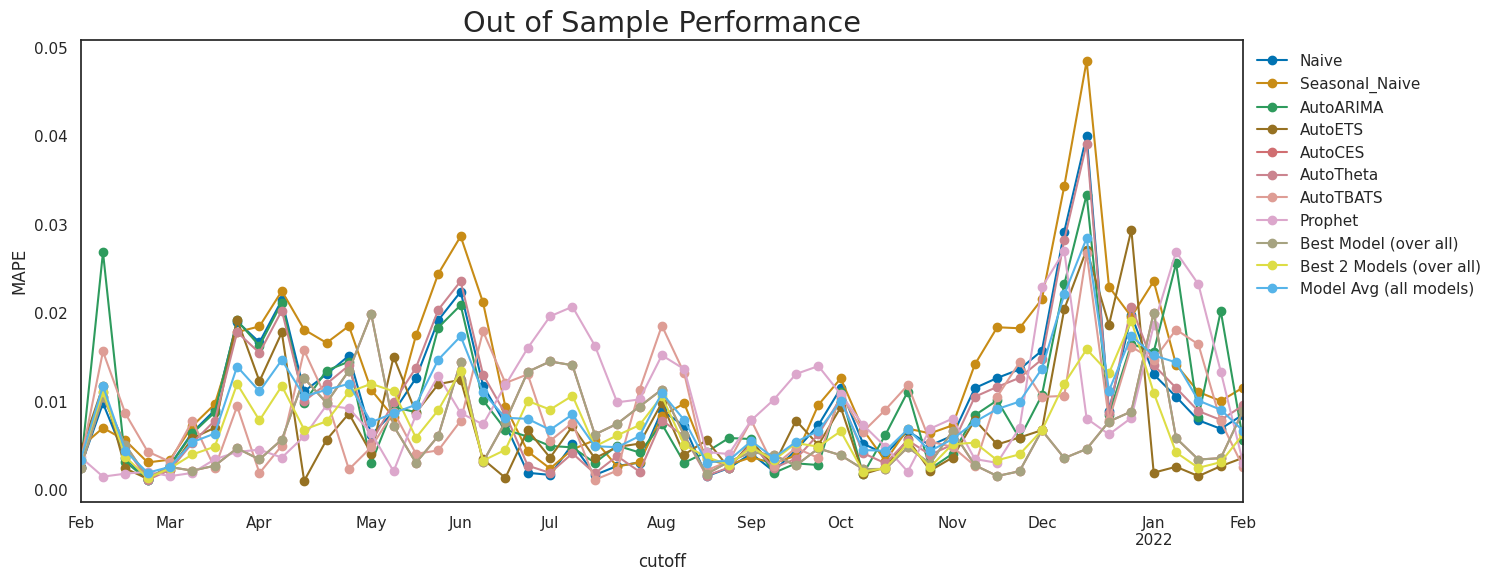

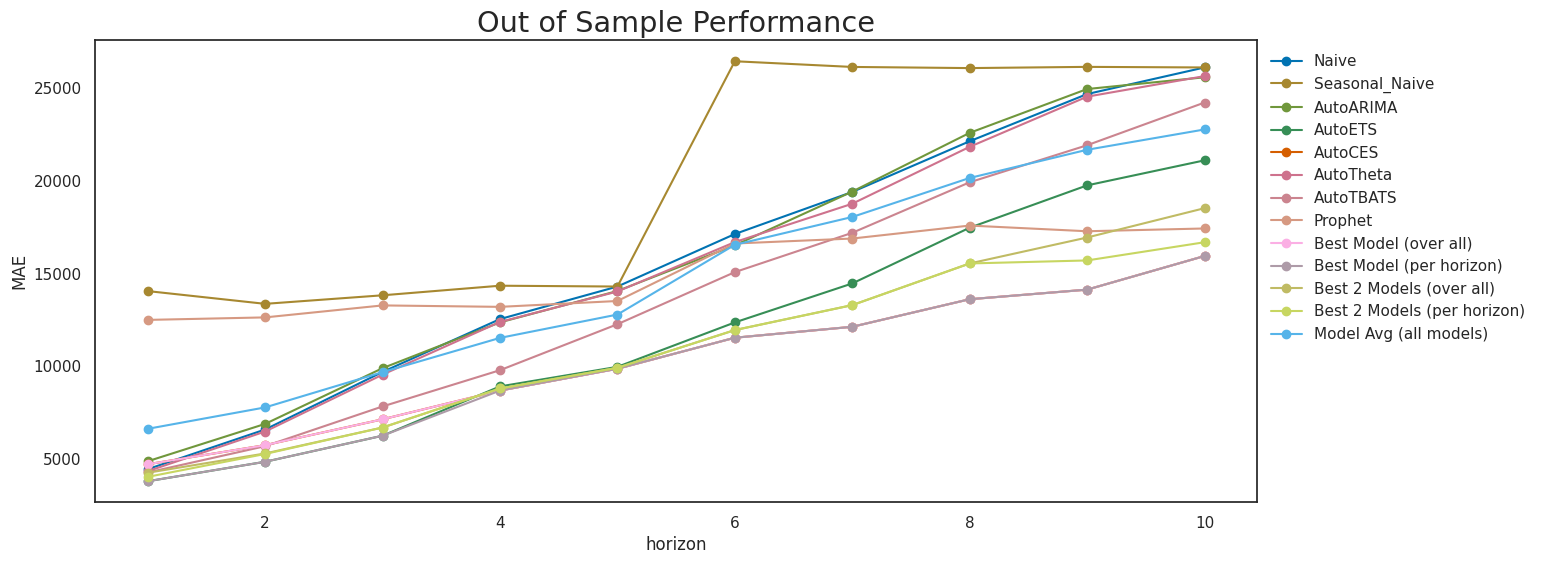

In [43]:
subset = ['AutoETS', 'AutoCES', 'AutoTBATS', 'Prophet','Model Avg (all models)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')
plt.savefig(os.path.join(output_folder, 'model_compare_per_cutoff.png'), dpi=300)
model.plot_model_compare(score ='MAE', view = 'horizon')#, model_subset=subset + ['Best Model (per horizon)'])
plt.savefig(os.path.join(output_folder, 'model_compare_per_horizon.png'), dpi=300)

In [44]:
model.fit(verbose = True)

Fitting Naive ...
Fitting Seasonal_Naive ...
Fitting AutoARIMA ...
Fitting AutoETS ...
Fitting AutoCES ...
Fitting AutoTheta ...
Fitting AutoTBATS ...


17:42:49 - cmdstanpy - INFO - Chain [1] start processing


Fitting Prophet ...


17:42:50 - cmdstanpy - INFO - Chain [1] done processing


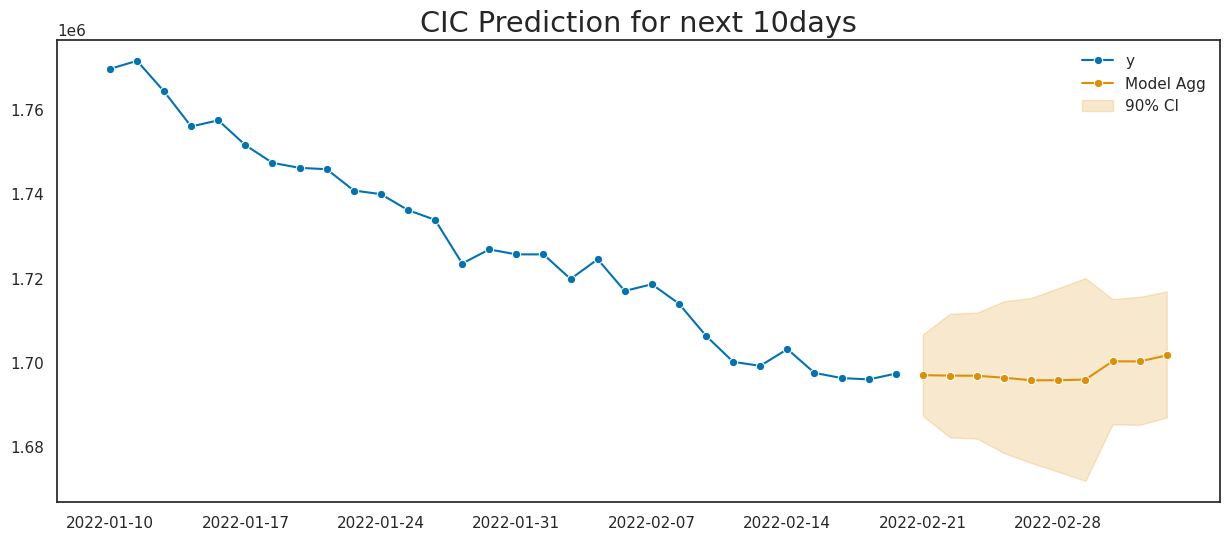

In [45]:
y_pred, y_pred_ints, preds, pred_ints = model.predict(X = holiday_type, mode='nbest_average_horizon', ret_underlying=True)
f, ax =model.plot_prediction(y_pred = y_pred,
                     models_preds = None,
                     y_pred_interval = y_pred_ints,
                            title = 'CIC Prediction for the next 10 days')

In [46]:
path = '../model_output/CIC_forecast.pkl'
model.save(path)